Import các thư viện cần thiết

In [1]:
# Thư viện đọc dataset
import pandas as pd

#Thư viện vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

#Thư viện xử lý các phép toán trong mô hình
import numpy as np

Đọc dữ liệu gốc

In [2]:
data = pd.read_csv('online_shoppers_intention_dataset.csv')
#Update header for dataset
header1 =['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']
data = data.reindex(columns=header1)
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0000,0.20,0.20,0.0,0.0,2,1,1,1,1,3,0,0
1,0,0.0,0,0.0,2,64.0000,0.00,0.10,0.0,0.0,2,2,2,1,2,3,0,0
2,0,0.0,0,0.0,1,0.0000,0.20,0.20,0.0,0.0,2,4,1,9,3,3,0,0
3,0,0.0,0,0.0,2,2.6667,0.05,0.14,0.0,0.0,2,3,2,2,4,3,0,0
4,0,0.0,0,0.0,10,627.5000,0.02,0.05,0.0,0.0,2,3,3,1,4,3,1,0


In [3]:
#Kiểm tra null value
data.isnull().values.any() # Returns False là data không có

False

In [4]:
# Kiểm tra số lượng class tại output cột Revenue
# Check ratio between 2 classes
st = round((data['Revenue'].value_counts()[1] / len (data)) * 100, 2)
nt = round((data['Revenue'].value_counts()[0] / len(data)) * 100, 2)

print ('Số giao dịch thành công (1): ', st,'(%)')
print ('Không xảy ra giao dịch (0): ', nt,'(%)')

Số giao dịch thành công (1):  15.47 (%)
Không xảy ra giao dịch (0):  84.53 (%)


Kiểm tra số lượng nhãn giữa 2 class chính 1 và 0 trong dữ liệu

Sau khi kiểm tra độ tương quan trong output ta nhận thấy
tỉ lệ Các giao dịch thành công là 15.47% và ngược lại là 84.53%.
Điều này được biểu thị qua biểu đồ sau

<AxesSubplot:xlabel='Revenue', ylabel='count'>

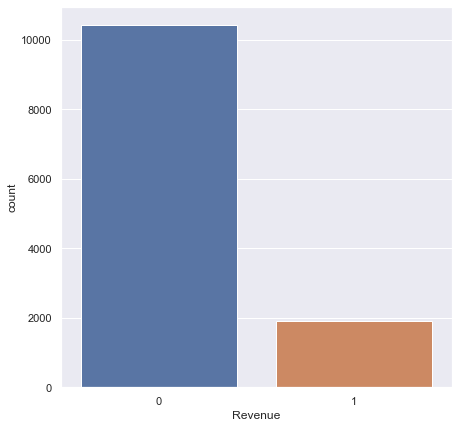

In [6]:
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
sns.countplot(x="Revenue",data=data)

In [7]:
#Vissualỉz dataset và thống kê mô tả

Administrative

<AxesSubplot:xlabel='Administrative', ylabel='Administrative_Duration'>

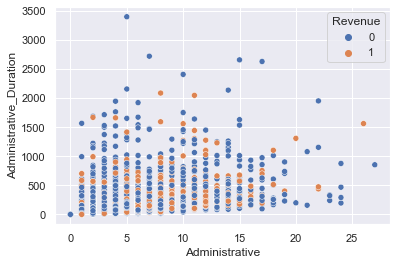

In [8]:
plt.subplot(111)
sns.scatterplot(x="Administrative", y="Administrative_Duration",hue="Revenue", data=data)

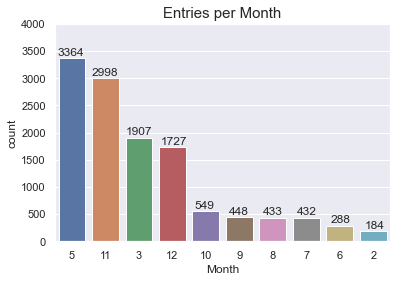

In [9]:
monthly = data['Month'].value_counts()

sns.countplot(x=data['Month'], order=monthly.index)
plt.title('Entries per Month', fontsize=15)
xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

Ở đây, chúng ta có thể thấy rằng cột 'Tháng' bị thiếu tháng Giêng và tháng Tư. Chúng ta có thể thấy trực quan rằng vài tháng có nhiều mẫu (tháng 5, tháng 11) và một vài tháng có rất ít mẫu (tháng 2, tháng 6). Chúng tôi sẽ loại bỏ cột này.

Tiếp theo, chúng ta hãy xem các cột 'Hệ điều hành' và 'Trình duyệt'.

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

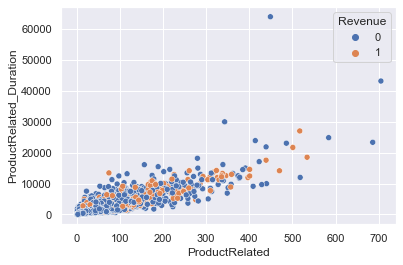

In [10]:
#Productrelated
plt.subplot(111)
sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration",hue="Revenue", data=data)

<AxesSubplot:xlabel='Informational', ylabel='Informational_Duration'>

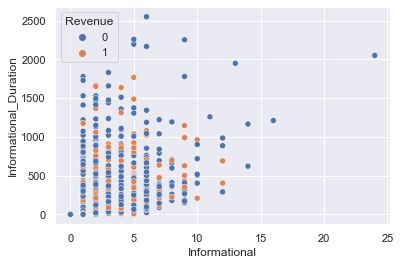

In [11]:
#information
plt.subplot(111)
sns.scatterplot(x="Informational", y="Informational_Duration",hue="Revenue", data=data)

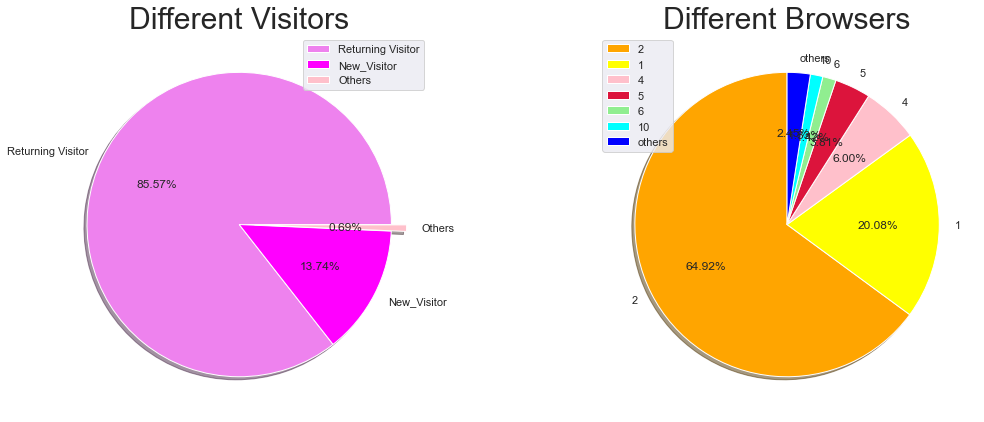

In [12]:
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

- Ở đây chúng ta có Hệ điều hành, được gắn nhãn theo số. Các trình duyệt ít sử dụng đã được hợp nhất thành nhãn '5'. Chúng ta có thể thấy rằng phần lớn người dùng sử dụng hệ điều hành số 2

- Hệ điều hành có thể chỉ ra người dùng của một loại máy tính riêng biệt và có thể mô tả một số kiểu người dùng nhất định (người dùng Windows, người dùng Mac, người dùng Linux). Hiện tại, chúng tôi sẽ bỏ qua việc sử dụng cột này cho bộ phân loại của chúng tôi.

# Tiền xử lý dữ liệu:

## Normalization numerical features  dụng Robust Scaler

Ta tiến hành normalization dataset trên, do đây là dữ liệu có outlayer khá cao.
Nên lúc này ta quyết định sử dụng RobustScaler
Bộ mở rộng này loại bỏ giá trị median và chia tỷ lệ dữ liệu theo phạm vi lượng tử (mặc định là IQR: Interquartile Range).
IQR q1 =25 và q3=75 (mặc đinh)
Việc lấy trọng tâm và chia tỷ lệ xảy ra độc lập trên từng feature bằng cách tính toán các số liệu thống kê có liên quan trên các mẫu trong tập train. median và IQR sau đó được lưu trữ để sử dụng cho dữ liệu sau này bằng hàm tranform()(hàm có sẵn).

In [13]:
#Loading thư viện RobustScaler từ Scikit learn
from sklearn.preprocessing import RobustScaler

#load mô hình RobustScaler
rob_scaler = RobustScaler()

data['scaled_Administrative'] = rob_scaler.fit_transform(data['Administrative'].values.reshape(-1,1))

data['scaled_Administrative_Duration'] = rob_scaler.fit_transform(data['Administrative_Duration'].values.reshape(-1,1))

data['scaled_Informational'] = rob_scaler.fit_transform(data['Informational'].values.reshape(-1,1))

data['scaled_Informational_Duration'] = rob_scaler.fit_transform(data['Informational_Duration'].values.reshape(-1,1))

data['scaled_ProductRelated'] = rob_scaler.fit_transform(data['ProductRelated'].values.reshape(-1,1))

data['scaled_ProductRelated_Duration'] = rob_scaler.fit_transform(data['ProductRelated_Duration'].values.reshape(-1,1))

data['scaled_BounceRates'] = rob_scaler.fit_transform(data['BounceRates'].values.reshape(-1,1))

data['scaled_ExitRates'] = rob_scaler.fit_transform(data['ExitRates'].values.reshape(-1,1))

data['scaled_PageValues'] = rob_scaler.fit_transform(data['PageValues'].values.reshape(-1,1))

data['scaled_SpecialDay'] = rob_scaler.fit_transform(data['SpecialDay'].values.reshape(-1,1))

Biểu diễn dữ liệu sau khi được chuẩn hóa

<AxesSubplot:title={'center':'After Robust Scaling Administrative_Duration'}, xlabel='scaled_Administrative_Duration', ylabel='Density'>

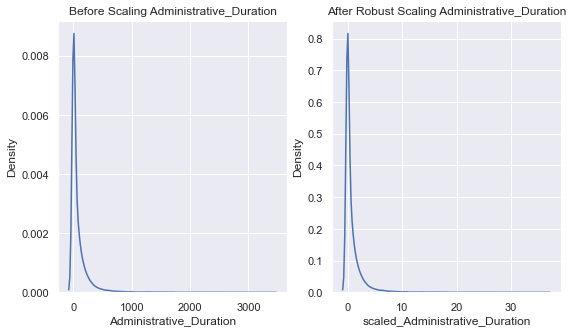

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 5))
ax1.set_title('Before Scaling Administrative_Duration')
sns.kdeplot(data['Administrative_Duration'], ax=ax1)

ax2.set_title('After Robust Scaling Administrative_Duration')
sns.kdeplot(data['scaled_Administrative_Duration'], ax=ax2)

Như ta thấy khoảng cách thay vì 0 -> 3500+ thì lúc này đã giảm xuống còn 0 -> 35+

<AxesSubplot:title={'center':'After Robust Scaling Informational_Duration'}, xlabel='scaled_ProductRelated_Duration', ylabel='Density'>

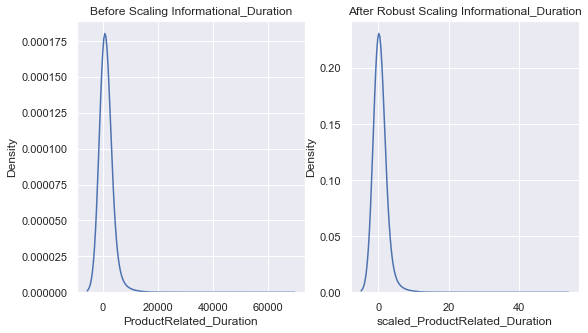

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 5))
ax1.set_title('Before Scaling Informational_Duration')
sns.kdeplot(data['ProductRelated_Duration'], ax=ax1,bw_method=1)

ax2.set_title('After Robust Scaling Informational_Duration')
sns.kdeplot(data['scaled_ProductRelated_Duration'], ax=ax2,bw_method=1)

## Normalization categorical features theo OneHotEncoding

In [16]:
#Load thư viện OneHotEncoding từ scikit-learn
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

#Danh sách các thuộc tính cần xử lý
categorical_cols = ['OperatingSystems', 'Browser', 'Month','Region','TrafficType','VisitorType','Weekend']

#đưa dữ liệu các thuộc tính cần xử lý vào one hotencoder
transformed_data = onehotencoder.fit_transform(data[categorical_cols])

#tạo một biến tạm để lưu dữ liệu mã hóa
encoded_data = pd.DataFrame(transformed_data, index=data.index)

# bây giờ ta gộp dữ liệu mã hóa vào biến tạm
concatenated_data = pd.concat([data, encoded_data], axis=1)

In [17]:
#Chuyển dữ liệu vào data gốc
data['scaled_OperatingSystems'] = concatenated_data['OperatingSystems']
data['scaled_Browser'] = concatenated_data['Browser']
data['scaled_Month'] = concatenated_data['Month']
data['scaled_Region'] = concatenated_data['Region']
data['scaled_TrafficType'] = concatenated_data['TrafficType']
data['scaled_VisitorType'] = concatenated_data['VisitorType']
data['scaled_Weekend'] = concatenated_data['Weekend']

In [18]:
#Loại bỏ nhưng cột chưa được làm sạch
data.drop(['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems', 'Browser', 'Month','Region','TrafficType','VisitorType','Weekend'], axis=1, inplace=True)

# xuất kết quả sau khi đã chuẩn hóa ra màn hình
data.head(5)

,Revenue,scaled_Administrative,scaled_Administrative_Duration,scaled_Informational,scaled_Informational_Duration,scaled_ProductRelated,scaled_ProductRelated_Duration,scaled_BounceRates,scaled_ExitRates,scaled_PageValues,scaled_SpecialDay,scaled_OperatingSystems,scaled_Browser,scaled_Month,scaled_Region,scaled_TrafficType,scaled_VisitorType,scaled_Weekend
0,0,-0.25,-0.080424,0.0,0.0,-0.548387,-0.467912,11.720238,4.896359,0.0,0.0,1,1,2,1,1,3,0
1,0,-0.25,-0.080424,0.0,0.0,-0.516129,-0.417913,-0.184524,2.095238,0.0,0.0,2,2,2,1,2,3,0
2,0,-0.25,-0.080424,0.0,0.0,-0.548387,-0.467912,11.720238,4.896359,0.0,0.0,4,1,2,9,3,3,0
3,0,-0.25,-0.080424,0.0,0.0,-0.516129,-0.465829,2.791667,3.215686,0.0,0.0,3,2,2,2,4,3,0
4,0,-0.25,-0.080424,0.0,0.0,-0.258065,0.022315,1.005952,0.694678,0.0,0.0,3,3,2,1,4,3,1


Tiếp theo chúng ta bắt đầu featur selection, vì không phải bất kỳ một feature nào trên dataset cũng có ảnh hưởng đến output.
Ở đây chúng tôi sử dụng MRMR(Minimum redundancy feature selection).Ở đây chúng ta sẽ lấy top 6 các feature ( cho kết quả đầu ra tốt nhất)

Chia tập dataset ra làm 2 phần X = là tất cả các biến độc lập (trừ output) Y = output Revenue

In [19]:
y = data.Revenue
X = data.drop('Revenue', axis=1)

## Features Selection

In [20]:
import unittest
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from mRMR.mrmr import MRMR

Kiểm tra loại của các features trước khi áp dung hàmKBinsDiscretizer

In [22]:
result = X.dtypes
result

scaled_Administrative             float64
scaled_Administrative_Duration    float64
scaled_Informational              float64
scaled_Informational_Duration     float64
scaled_ProductRelated             float64
scaled_ProductRelated_Duration    float64
scaled_BounceRates                float64
scaled_ExitRates                  float64
scaled_PageValues                 float64
scaled_SpecialDay                 float64
scaled_OperatingSystems             int64
scaled_Browser                      int64
scaled_Month                        int64
scaled_Region                       int64
scaled_TrafficType                  int64
scaled_VisitorType                  int64
scaled_Weekend                      int64
dtype: object

In [23]:
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_discr = discretizer.fit_transform(X)

In [24]:
features = X.columns
mrmr = MRMR(n_features=6)
selected_indices = mrmr.fit(X_discr, y.to_list())
selected_feature_names = features[selected_indices]

print('Các feature được thứ tự giảm dần (top 6)', selected_feature_names.to_list())

Các feature được thứ tự giảm dần (top 6) ['scaled_ExitRates', 'scaled_BounceRates', 'scaled_Month', 'scaled_VisitorType', 'scaled_PageValues', 'scaled_SpecialDay']


Chia 30% tập test và 70% for make a train sheet

In [26]:
#load thư viện chia data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)



X_train:

      scaled_BounceRates  scaled_ExitRates  scaled_PageValues  \
2646           -0.184524         -0.355742                0.0   
5004            0.291667          0.078431                0.0   
7219           -0.184524         -0.327731                0.0   
2565            3.386905          2.282913                0.0   
6369            7.255952          3.028011                0.0   

      scaled_SpecialDay  scaled_Month  scaled_VisitorType  
2646                0.0             5                   3  
5004                0.0             5                   3  
7219                0.0            10                   3  
2565                0.8             5                   3  
6369                0.0             7                   3  
(8631, 6)

X_test:

       scaled_BounceRates  scaled_ExitRates  scaled_PageValues  \
7860            -0.184524         -0.221289                0.0   
5695            -0.184524          0.694678                0.0   
3406            -0.1

## Cân Bằng dữ liệu:

<AxesSubplot:xlabel='Revenue', ylabel='count'>

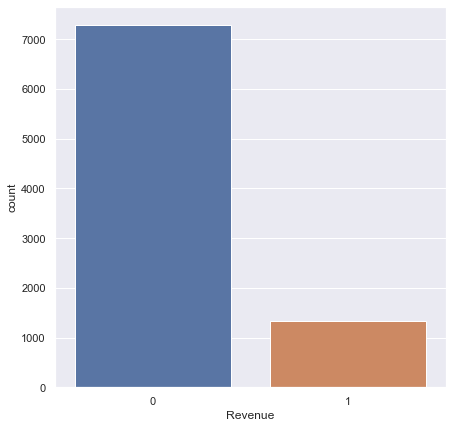

In [29]:
#Dữ liệu trước khi tiến hành cân bằng
training_data = pd.concat([X_train,y_train],axis = 1)
training_data['Revenue'].value_counts()
#vẽ mô hình 
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
sns.countplot(x="Revenue", data= training_data)


Đây là kết quả thu được tương ứng vs output 0,1 của tập train ta nhận thấy chúng đã bị mất cân bằng 
Bước kế tiếp ta tiến hành Over-sampling cho dữ liệu mất cân bằng trên

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  14576


<AxesSubplot:xlabel='Revenue', ylabel='count'>

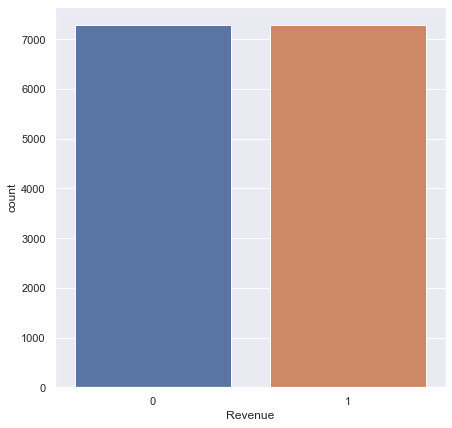

In [30]:
# Success/fail data
Good = training_data[training_data['Revenue'] == 1]
bad = training_data[training_data['Revenue'] == 0]

# Số lương giao dịch Thành công và ngược lại
number_records_fraud = len(Good)
number_records_non_fraud = len (bad)

over_sample_fraud = Good.sample (number_records_non_fraud, replace = True) # with replacement, since we take a larger sample than population
over_sample_data = pd.concat ([over_sample_fraud, bad], axis = 0)

# Showing ratio
print("Percentage of normal transactions: ", len(over_sample_data[over_sample_data.Revenue == 0])/len(over_sample_data))
print("Percentage of fraud transactions: ", len(over_sample_data[over_sample_data.Revenue == 1])/len(over_sample_data))
print("Total number of transactions in resampled data: ", len(over_sample_data))

# Assigning X, y for over-sampled dataset
X_train_oversample = over_sample_data.drop ('Revenue', axis = 1)
y_train_oversample = over_sample_data['Revenue']

# Plot countplot
plt.figure(figsize=(7,7))
sns.set(style="darkgrid")
sns.countplot(x="Revenue", data=over_sample_data)

Tập train đã được cân bằng, sau đây ta sẽ tiến hành quá trình phân loại.

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
mlp_model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10), random_state=1,verbose=1)

In [32]:
#Huấn luyện mô hình
mlp_model.fit(X_train_oversample, y_train_oversample)
#Dự đoán kết quả với mô hình mlp
y_pred1 = mlp_model.predict(X_test)

Iteration 1, loss = 1.54599049
Iteration 2, loss = 0.77632509
Iteration 3, loss = 0.55301575
Iteration 4, loss = 0.49873456
Iteration 5, loss = 0.47932350
Iteration 6, loss = 0.46601408
Iteration 7, loss = 0.45497496
Iteration 8, loss = 0.44678117
Iteration 9, loss = 0.44074632
Iteration 10, loss = 0.43044772
Iteration 11, loss = 0.41618222
Iteration 12, loss = 0.40852930
Iteration 13, loss = 0.40316256
Iteration 14, loss = 0.39878401
Iteration 15, loss = 0.39554849
Iteration 16, loss = 0.39235659
Iteration 17, loss = 0.39027505
Iteration 18, loss = 0.38825977
Iteration 19, loss = 0.38617953
Iteration 20, loss = 0.38496845
Iteration 21, loss = 0.38363347
Iteration 22, loss = 0.38239257
Iteration 23, loss = 0.38140393
Iteration 24, loss = 0.38032852
Iteration 25, loss = 0.37984025
Iteration 26, loss = 0.37874957
Iteration 27, loss = 0.37885612
Iteration 28, loss = 0.37821425
Iteration 29, loss = 0.37813449
Iteration 30, loss = 0.37815145
Iteration 31, loss = 0.37720281
Iteration 32, los

In [42]:
# confusion matrix to precision + recall
def cm2pr_binary(cm):
    p = cm[0,0]/np.sum(cm[:,0])
    r = cm[0,0]/np.sum(cm[0])
    return (p, r)

def evaluate_model(y_test,y_pred):
    print('Độ chính xác là: ',accuracy_score(y_test, y_pred))
    cm3 = confusion_matrix(y_test, y_pred3)
    tp, fp, fn, tn = cm3.ravel()
    print('Số lượng các giao dịch thành công được dự đoán (True positive):',tp)
    print('Số lượng các giao dịch thất bại bị phân loại nhầm là thành công',fp)
    print('Số lượng các giao dịch thất bại được dự đoán đúng',tn)
    print('Số lượng các giao dịch thành công bị phân loại nhầm là thất bại',fn)
    print("True Positive rate = {0:.3f}".format(tp/(tp+fn)))
    print("True Negative rate = {0:.3f}".format(tn/(tn+fp)))
    p,r = cm2pr_binary(cm3)
    print("Giá trị precision = {0:.3f} ".format(p))
    print("Giá trị recall = {0:.3f}".format(r))
    F1 = 2 * (p * r) / (p + r)
    print("Giá trị F1 Score = {0:.2f}".format(p, r))

In [43]:
#Đánh giá mô hình
evaluate_model(y_test,y_pred1)

Độ chính xác là:  0.8688834820221681
Số lượng các giao dịch thành công được dự đoán (True positive): 2822
Số lượng các giao dịch thất bại bị phân loại nhầm là thành công 312
Số lượng các giao dịch thất bại được dự đoán đúng 391
Số lượng các giao dịch thành công bị phân loại nhầm là thất bại 174
True Positive rate = 0.942
True Negative rate = 0.556
Giá trị precision = 0.942 
Giá trị recall = 0.900
Giá trị F1 Score = 0.94


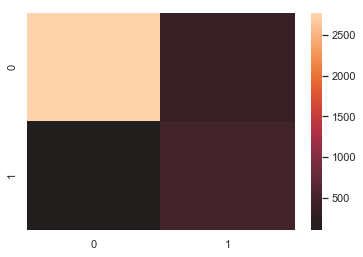

In [18]:
sns.heatmap(cm,center=True)
plt.show()

In [19]:
# confusion matrix to precision + recall
def cm2pr_binary(cm):
    p = cm[0,0]/np.sum(cm[:,0])
    r = cm[0,0]/np.sum(cm[0])
    return (p, r)
p,r = cm2pr_binary(cm)
print("Giá trị precition = {0:.2f} và giá trị recall = {1:.2f}".format(p, r))

Giá trị precition = 0.97 và giá trị recall = 0.88


Precision cao đồng nghĩa với việc độ chính xác của các điểm tìm được là cao. 
Recall cao đồng nghĩa với việc True Positive Rate cao, tức tỉ lệ bỏ sót các điểm thực sự positive là thấp.
Giá trị F1 Score thể hiện tốt nhất độ tốt của bộ phân lớp trên.

In [20]:
F1 = 2 * (p * r) / (p + r)
print("F1 Score = {0:.2f}".format(p, r))

F1 Score = 0.97


## c4.5 Tree Classifier

In [35]:
#loading thư viện C4.5
from c45_tree_classifier import C45
c45_model = C45(attrNames=X.columns)
#Huấn luyện mô hình
c45_model.fit(X_train_oversample, y_train_oversample)
#Dự đoán mô hình
y_pred2 = c45_model.predict(X_test)

In [44]:
#Đánh giá mô hình
evaluate_model(y_test,y_pred2)

Độ chính xác là:  0.8542849418761828
Số lượng các giao dịch thành công được dự đoán (True positive): 2822
Số lượng các giao dịch thất bại bị phân loại nhầm là thành công 312
Số lượng các giao dịch thất bại được dự đoán đúng 391
Số lượng các giao dịch thành công bị phân loại nhầm là thất bại 174
True Positive rate = 0.942
True Negative rate = 0.556
Giá trị precision = 0.942 
Giá trị recall = 0.900
Giá trị F1 Score = 0.94


## RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier
ramdomforest_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
#Huấn luyện mô hình Randomforest 
ramdomforest_model.fit(X_train_oversample, y_train_oversample)
#Dự đoán kết quả sử dụng mô hình randomforest
y_pred3 = ramdomforest_model.predict(X_test)

In [45]:
#Đánh giá mô hình
evaluate_model(y_test,y_pred3)

Độ chính xác là:  0.8686131386861314
Số lượng các giao dịch thành công được dự đoán (True positive): 2822
Số lượng các giao dịch thất bại bị phân loại nhầm là thành công 312
Số lượng các giao dịch thất bại được dự đoán đúng 391
Số lượng các giao dịch thành công bị phân loại nhầm là thất bại 174
True Positive rate = 0.942
True Negative rate = 0.556
Giá trị precision = 0.942 
Giá trị recall = 0.900
Giá trị F1 Score = 0.94
